<a href="https://colab.research.google.com/github/vitaoTM/python_projects/blob/master/Criando_base_de_dados_de_uma_escola_fict%C3%ADcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m')
print('Quantidade de nomes ' + str(len(nomes_f) + len(nomes_m)))
frames = [nomes_m, nomes_f]
nomes = pd.concat(frames)['nome'].to_frame()
nomes.head()

Quantidade de nomes 40


,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS


In [4]:
np.random.seed(123)

In [5]:
total_alunos = len(nomes)
total_alunos

40

In [6]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes.sample(3)

,nome,id_aluno
8,LUIZ,14
15,LETICIA,20
0,MARIA,26


In [7]:
dominios = ['@dominio_do_email.com', '@servico_doemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
14,JESSICA,23,@dominio_do_email.com
2,ANTONIO,13,@servico_doemail.com
12,AMANDA,33,@servico_doemail.com
9,MARCOS,21,@servico_doemail.com
11,GABRIEL,38,@dominio_do_email.com


In [8]:
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
4,CARLOS,6,@dominio_do_email.com,carlos@dominio_do_email.com
0,JOSE,7,@dominio_do_email.com,jose@dominio_do_email.com
13,BRUNA,34,@dominio_do_email.com,bruna@dominio_do_email.com
15,BRUNO,40,@servico_doemail.com,bruno@servico_doemail.com
11,GABRIEL,38,@dominio_do_email.com,gabriel@dominio_do_email.com


# Criando tabela de Cursos

In [9]:
# instalando bibliotecas
!pip3 install html5lib
!pip3 install lxml
import html5lib

In [10]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos = cursos[0]
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando index do curso 

In [11]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [12]:
cursos['id']  = cursos.index + 1
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando Alunos

In [13]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [14]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
2,FRANCISCA,27,@servico_doemail.com,francisca@servico_doemail.com,1
9,ALINE,16,@dominio_do_email.com,aline@dominio_do_email.com,4
6,PEDRO,24,@servico_doemail.com,pedro@servico_doemail.com,7
14,JESSICA,23,@dominio_do_email.com,jessica@dominio_do_email.com,2
12,RAFAEL,25,@servico_doemail.com,rafael@servico_doemail.com,1


In [15]:
nomes['matriculas'].describe()

count    40.000000
mean      2.050000
std       1.299901
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: matriculas, dtype: float64

In [16]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


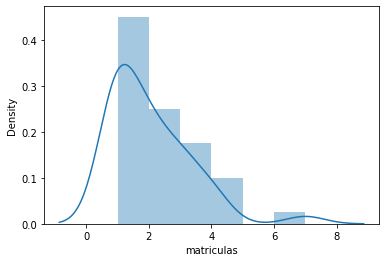

In [17]:
sns.distplot(nomes['matriculas'])

In [18]:
nomes['matriculas'].value_counts()

1    18
2    10
3     7
4     4
7     1
Name: matriculas, dtype: int64

In [19]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,BRUNO,40,@servico_doemail.com,bruno@servico_doemail.com,2
8,LUIZ,14,@dominio_do_email.com,luiz@dominio_do_email.com,1
16,EDUARDO,4,@servico_doemail.com,eduardo@servico_doemail.com,1
6,MARCIA,15,@dominio_do_email.com,marcia@dominio_do_email.com,2
12,RAFAEL,25,@servico_doemail.com,rafael@servico_doemail.com,1


# Selecionando Cursos

In [20]:
nomes.sample(4)

,nome,id_aluno,dominio,email,matriculas
7,FERNANDA,1,@servico_doemail.com,fernanda@servico_doemail.com,1
3,ANTONIA,36,@servico_doemail.com,antonia@servico_doemail.com,3
5,JULIANA,28,@dominio_do_email.com,juliana@dominio_do_email.com,1
11,CAMILA,37,@servico_doemail.com,camila@servico_doemail.com,1


In [21]:
todas_matriculas = []
x = np.random.rand(20)
probab = x / sum(x)

In [22]:
for index, rows in nomes.iterrows():
    id = rows.id_aluno
    matriculas =  rows.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = probab)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])


In [23]:
matriculas.head()

,id_aluno,id_curso
0,7,2
1,7,10
2,7,3
3,11,11
4,13,1


In [24]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'numero_de_alunos'})

,numero_de_alunos,nome_do_curso
id_curso,,
1,10,Lógica de programação
2,6,Java para Web
3,9,C# para Web
5,3,Cursos de Python
6,8,PHP com MySql
7,1,.NET para web
8,6,Novas integrações com Java
9,3,TDD com Java
10,4,Código limpo com C#


# Revisando dataframes criados

In [25]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
11,CAMILA,37,@servico_doemail.com,camila@servico_doemail.com,1
7,FERNANDA,1,@servico_doemail.com,fernanda@servico_doemail.com,1
14,JESSICA,23,@dominio_do_email.com,jessica@dominio_do_email.com,2


In [26]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [27]:
matriculas.head()

,id_aluno,id_curso
0,7,2
1,7,10
2,7,3
3,11,11
4,13,1


In [28]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'numero_de_alunos'})

In [29]:
matriculas_por_curso.head()

,numero_de_alunos,nome_do_curso
id_curso,,
1,10,Lógica de programação
2,6,Java para Web
3,9,C# para Web
5,3,Cursos de Python
6,8,PHP com MySql


# Saida em diferentes formatos

In [30]:
matriculas_por_curso.head()

,numero_de_alunos,nome_do_curso
id_curso,,
1,10,Lógica de programação
2,6,Java para Web
3,9,C# para Web
5,3,Cursos de Python
6,8,PHP com MySql


In [31]:
matriculas_por_curso.to_csv('Matriculas_por_curso')

In [32]:
matriculas_json = matriculas_por_curso.to_json()

In [33]:
matriculas_html = matriculas_por_curso.to_html()

# Criando banco de dados SQL

In [34]:
!pip3 install sqlalchemy

In [35]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco SQL 

In [36]:
query = 'select * from matriculas where numero_de_alunos < 20'

In [37]:
pd.read_sql(query, engine).head()

,id_curso,numero_de_alunos,nome_do_curso
0,1,10,Lógica de programação
1,2,6,Java para Web
2,3,9,C# para Web
3,5,3,Cursos de Python
4,6,8,PHP com MySql


In [38]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'numero_de_alunos'])

,nome_do_curso,numero_de_alunos
0,Lógica de programação,10
1,Java para Web,6
2,C# para Web,9
3,Cursos de Python,3
4,PHP com MySql,8
5,.NET para web,1
6,Novas integrações com Java,6
7,TDD com Java,3
8,Código limpo com C#,4
9,Preparatório para certificação Java,2


In [39]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'numero_de_alunos'])
muitas_matriculas.head()

,nome_do_curso,numero_de_alunos
0,Lógica de programação,10
1,Java para Web,6
2,C# para Web,9
3,Cursos de Python,3
4,PHP com MySql,8


In [40]:
muitas_matriculas.query('numero_de_alunos > 5')

,nome_do_curso,numero_de_alunos
0,Lógica de programação,10
1,Java para Web,6
2,C# para Web,9
4,PHP com MySql,8
6,Novas integrações com Java,6
14,Internet das coisas,6
15,Boas práticas em Java,7
16,Orientação objetos com Java,6


In [41]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [42]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos da proxima turma

In [43]:
matriculas_por_curso

,numero_de_alunos,nome_do_curso
id_curso,,
1,10,Lógica de programação
2,6,Java para Web
3,9,C# para Web
5,3,Cursos de Python
6,8,PHP com MySql
7,1,.NET para web
8,6,Novas integrações com Java
9,3,TDD com Java
10,4,Código limpo com C#


In [44]:
matriculas

,id_aluno,id_curso
0,7,2
1,7,10
2,7,3
3,11,11
4,13,1
...,...,...
77,29,8
78,3,3
79,3,1
80,3,3


In [45]:
id_curso = 5
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
59,16,5
71,20,5
72,18,5


In [46]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,JOSE,7,@dominio_do_email.com,jose@dominio_do_email.com,3
1,JOAO,11,@servico_doemail.com,joao@servico_doemail.com,1
2,ANTONIO,13,@servico_doemail.com,antonio@servico_doemail.com,2
3,FRANCISCO,39,@servico_doemail.com,francisco@servico_doemail.com,1
4,CARLOS,6,@dominio_do_email.com,carlos@dominio_do_email.com,2


In [47]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
16,5,ALINE,@dominio_do_email.com,aline@dominio_do_email.com,4
20,5,LETICIA,@dominio_do_email.com,leticia@dominio_do_email.com,1
18,5,JULIA,@servico_doemail.com,julia@servico_doemail.com,2


In [48]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
16      ALINE
20    LETICIA
18      JULIA
Name: nome, dtype: object

In [49]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
16,ALINE
20,LETICIA
18,JULIA


In [50]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [51]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [52]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [53]:
proxima_turma.rename(columns = {'nome': f'Alunos do curso de {nome_curso}'})

,Alunos do curso de Cursos de Python
id_aluno,
16,ALINE
20,LETICIA
18,JULIA


# EXCEL

In [54]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)